## Connect To Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Needed Libraries

In [2]:
!pip install torchinfo

In [3]:
!pip install --upgrade mlxtend


In [4]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 6.1 MB/s eta 0:00:00


In [5]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

# Import Libraries

In [6]:
import data_setup
from pathlib import Path
import glob
import random
from PIL import Image
import torchvision
import torch
import torch.optim.lr_scheduler as lr_scheduler

# Data Analysis and Exploration
* Unzip the file path
* Create variables for each directory

In [7]:
data_setup.unzip_file_dir('/content/drive/MyDrive/Brain_Tumor_MRI_Classfication.zip',
                          '/content/data_path/brain-tumor-mri-image-classification')

'[INFO]: your file has been unzipped to /content/data_path/brain-tumor-mri-image-classification directory'

In [8]:
image_path=Path('/content/data_path/brain-tumor-mri-image-classification/Brain_Tumor_MRI_Classfication')
test_dir= Path('/content/data_path/brain-tumor-mri-image-classification/Brain_Tumor_MRI_Classfication/Testing')
train_dir= Path('/content/data_path/brain-tumor-mri-image-classification/Brain_Tumor_MRI_Classfication/Training')
val_dir= Path('/content/data_path/brain-tumor-mri-image-classification/Brain_Tumor_MRI_Classfication/Validation')

In [9]:
data_setup.walkthrough_dir(image_path)

there are 3 directories and 0 images in /content/data_path/brain-tumor-mri-image-classification/Brain_Tumor_MRI_Classfication
there are 4 directories and 0 images in /content/data_path/brain-tumor-mri-image-classification/Brain_Tumor_MRI_Classfication/Training
there are 0 directories and 2147 images in /content/data_path/brain-tumor-mri-image-classification/Brain_Tumor_MRI_Classfication/Training/glioma_tumor
there are 0 directories and 2161 images in /content/data_path/brain-tumor-mri-image-classification/Brain_Tumor_MRI_Classfication/Training/meningioma_tumor
there are 0 directories and 2284 images in /content/data_path/brain-tumor-mri-image-classification/Brain_Tumor_MRI_Classfication/Training/pituitary_tumor
there are 0 directories and 1990 images in /content/data_path/brain-tumor-mri-image-classification/Brain_Tumor_MRI_Classfication/Training/no_tumor
there are 4 directories and 0 images in /content/data_path/brain-tumor-mri-image-classification/Brain_Tumor_MRI_Classfication/Valida

# Explore file path

In [10]:
import glob
data_list= list(image_path.glob(pattern= '*/*/*.jpg'))
train_data_list= list(train_dir.glob(pattern= '*/*.jpg'))
val_data_list= list(val_dir.glob(pattern= '*/*.jpg'))
test_data_list= list(test_dir.glob(pattern= '*/*.jpg'))

In [11]:
total_data_length= len(data_list)
train_data_length= len(train_data_list)
test_data_length= len(test_data_list)
val_data_length= len(val_data_list)
a= f'The data are distributed as follow:\nThe length of the whole data is: {total_data_length}\nThe length of training data is {train_data_length}'
b= f'\nThe length of testing data is: {test_data_length}\nThe length of validation data is {val_data_length} '
print (a+b)

The data are distributed as follow:
The length of the whole data is: 11120
The length of training data is 8582
The length of testing data is: 1705
The length of validation data is 833 


# the data in the previous model was imbalanced so more data was collected to perform this experiment.
* check for duplicated values

In [12]:
len(train_data_list), len(set(train_data_list))

(8582, 8582)

Random image path: /content/data_path/brain-tumor-mri-image-classification/Brain_Tumor_MRI_Classfication/Training/pituitary_tumor/Tr-pi_0289.jpg
image class: pituitary_tumor
image height: 512
image width: 512


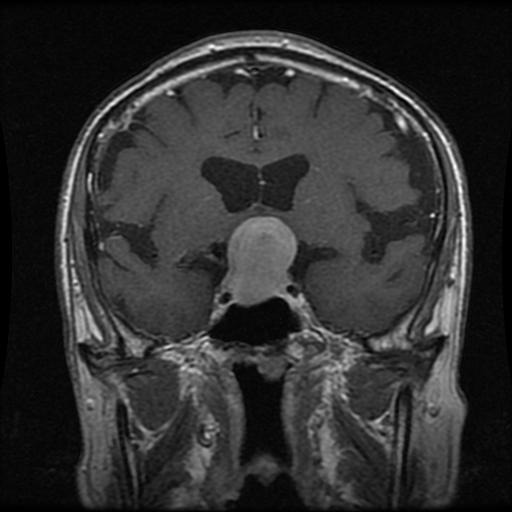

In [13]:
# there is no duplicated image in our dataset. now viewing an image and making a function to view image later on
import random
random_= random.choice(data_list)
img= Image.open(random_)
image_class= random_.parent.stem
print (f'Random image path: {random_}')
print (f'image class: {image_class}')
print (f'image height: {img.height}')
print (f'image width: {img.width}')
img

# Setting up my envronment for transfer learning

In [14]:
# Import efficientnet b0 weights
weights= torchvision.models.EfficientNet_B0_Weights.DEFAULT
dir(weights)

['__class__',
 '__doc__',
 '__module__',
 'get_state_dict',
 'meta',
 'name',
 'transforms',
 'url',
 'value',
 'verify']

In [15]:
transform=weights.transforms()
transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [16]:
train_dataloader, test_dataloader, val_dataloader, class_names= data_setup.dataloader_function(test_dir= test_dir,
                                                                                    train_dir= train_dir,
                                                                                    transform= transform,
                                                                                    val_dir= val_dir,
                                                                                    batchsize=16,
                                                                                    num_worker=2)

In [17]:
train_dataloader, test_dataloader, val_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7dcd6f3f9300>,
 ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'])

# Exploring the data in batches

In [18]:
train_feature_batch, train_label_batch= next(iter(train_dataloader))
train_feature_batch.shape, train_label_batch.shape

(torch.Size([16, 3, 224, 224]), torch.Size([16]))

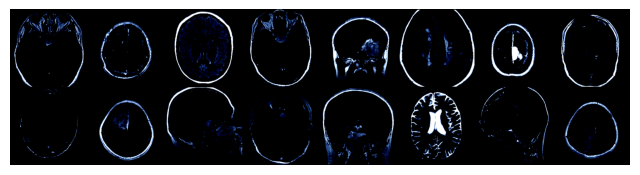

In [19]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Show images
plt.figure(figsize=(8, 8))
plt.imshow(make_grid(train_feature_batch, nrow=8).permute(1, 2, 0))
plt.axis('off')
plt.show()

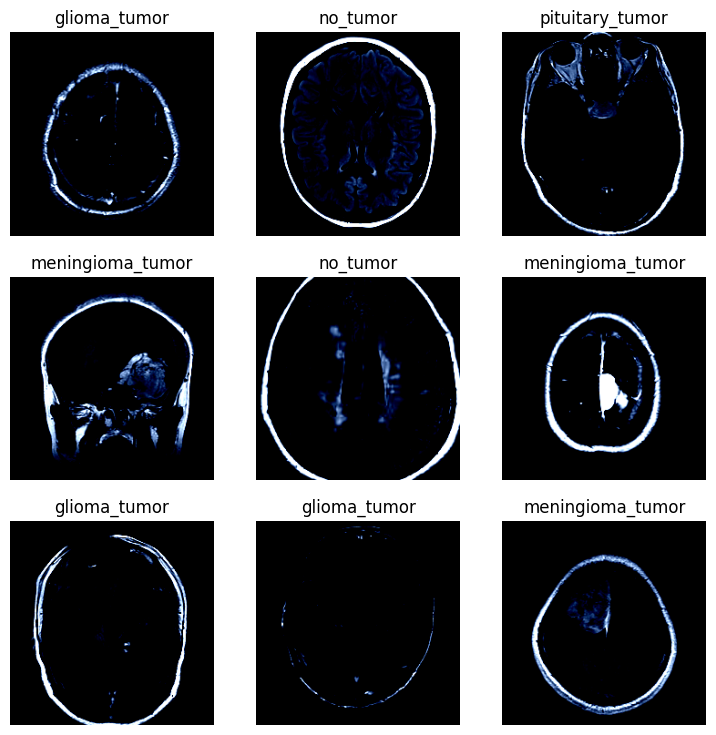

In [20]:
import explore
explore.show_image(image_data=train_feature_batch[: 10].permute(0,2,3,1), class_names= train_label_batch[: 10], classes_names= class_names);

# Setting up GPU

In [21]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Prebuilt model was used for this experiment, Efficientnetb0 was choosen because it is fast to compute and it is also scoring high unlike other models

In [22]:
weights= torchvision.models.EfficientNet_B0_Weights.DEFAULT
model= torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 73.4MB/s]


In [23]:
from torchinfo import summary

summary(model= model,
        input_size= (1,3,224,224), # example of size of data we want to pass into our model
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings= ['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

In [24]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [25]:
from torch import nn
model.classifier= nn.Sequential(
    nn.Dropout(p=0.2, inplace= True),
    nn.Linear(in_features= 1280, out_features= len(class_names))

).to(device)
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=4, bias=True)
)

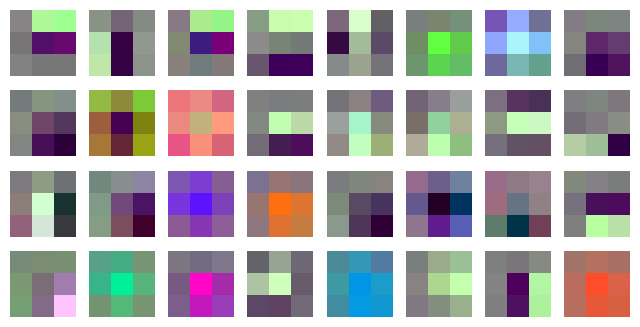

In [26]:
import numpy as np
with torch.no_grad():
  params = list(model.parameters())
  fig, axs = plt.subplots(4, 8, figsize=(8, 4))
  filters = []
  for filter_index in range(params[0].shape[0]):
    row_index = filter_index // 8
    col_index = filter_index % 8

    filter = params[0][filter_index,:,:,:]
    filter_image = filter.permute(1, 2, 0).cpu()
    scale = np.abs(filter_image).max()
    scaled_image = filter_image / (2 * scale) + 0.5
    filters.append(scaled_image.cpu())
    axs[row_index, col_index].imshow(scaled_image.cpu())
    axs[row_index, col_index].axis('off')
  plt.show()

# Transfer learning with finetuning

In [27]:
summary(model= model,
        input_size= (1,3,288,288), # example of size of data we want to pass into our model
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings= ['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 288, 288]     [1, 4]               --                   True
├─Sequential (features)                                      [1, 3, 288, 288]     [1, 1280, 9, 9]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 288, 288]     [1, 32, 144, 144]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 288, 288]     [1, 32, 144, 144]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 144, 144]    [1, 32, 144, 144]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 144, 144]    [1, 32, 144, 144]    --                   --
│    └─Sequential (1)                                        [1, 32, 144, 144]    [1, 16, 144,

# Setting up loss function and optimizer

In [28]:
from torch.nn.modules.loss import CrossEntropyLoss
loss_fn= CrossEntropyLoss()
optimizer= torch.optim.SGD(model.parameters(), lr= 0.09)

## Train the model

In [29]:
import train

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# start timer
from timeit import default_timer as timer
start_time = timer()
# train_data
result= train.training_loop(train_dataloader= train_dataloader, test_dataloader=test_dataloader,
                      epochs=20, device= device, optimizer= optimizer, loss_fn= loss_fn, model=model)

end_time= timer()
print (f'time taken is {end_time- start_time}')

  0%|          | 0/20 [00:00<?, ?it/s]

train accuracy: 0.9201582867783985 | train_loss: 0.23113527407286968 | test accuracy: 0.8650051921079959 | test loss: 0.4643391281150114
train accuracy: 0.9791666666666666 | train_loss: 0.06599123760892227 | test accuracy: 0.9345794392523364 | test loss: 0.34544964483204715
train accuracy: 0.9915037243947858 | train_loss: 0.0254997654072897 | test accuracy: 0.9189382139148494 | test loss: 0.38983443682598795
train accuracy: 0.9951117318435754 | train_loss: 0.01642014422657233 | test accuracy: 0.9164719626168224 | test loss: 0.46771004572239316
train accuracy: 0.9936374922408443 | train_loss: 0.02054004495982098 | test accuracy: 0.8425493250259605 | test loss: 0.6634723885968907
train accuracy: 0.9962756052141527 | train_loss: 0.012236424461834707 | test accuracy: 0.9160176531671859 | test loss: 0.4410687823958841
train accuracy: 0.9990689013035382 | train_loss: 0.003861080006460811 | test accuracy: 0.9375 | test loss: 0.3943624385899023
train accuracy: 0.9983705772811918 | train_loss: 

In [30]:
# Saving the model
target_dir_path = Path('Models')
target_dir_path.mkdir(parents=True,
                      exist_ok=True)
model_path= target_dir_path / 'pretrained_effnetb0_feature_extractor_brain_tumor.pth'
torch.save(obj=model.state_dict(),f= model_path)


In [31]:
import matplotlib.pyplot as plt

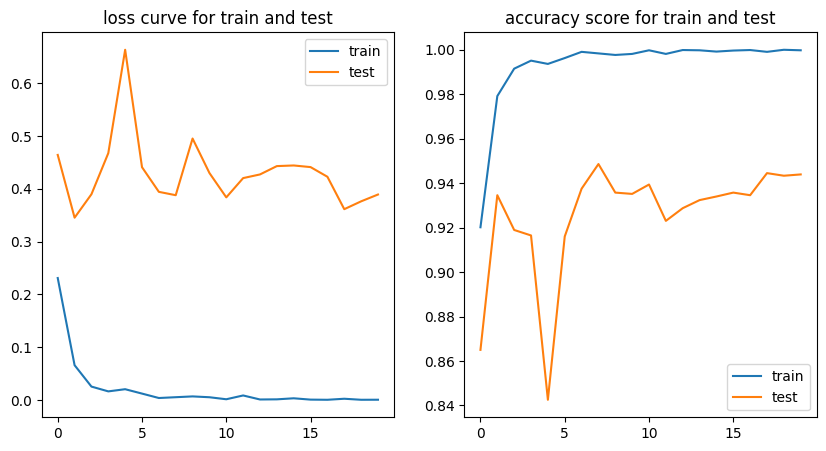

In [32]:
# Plot loss curve ans accuracy
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(result['train_loss'], label= 'train')
plt.plot(result['test_loss'], label= 'test')
plt.title('loss curve for train and test')
plt.legend();
plt.subplot(1,2,2)
plt.plot(result['train_accuracy'], label= 'train')
plt.plot(result['test_accuracy'], label= 'test')
plt.title('accuracy score for train and test')
plt.legend();

In [34]:
#Evaluate the model
import evaluation
evaluation.eval_model(model= model, dataloader= val_dataloader, loss_fn= loss_fn, device= device)

{'model name': 'EfficientNet',
 'accuracy': 0.9929245283018868,
 'loss': tensor(0.0226, device='cuda:0')}

In [35]:
from torchvision import datasets, transforms
test_val_transform= test_val_transform= transforms.Compose([
    transforms.Resize(size= (224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])])
val_data= datasets.ImageFolder(val_dir, test_val_transform)

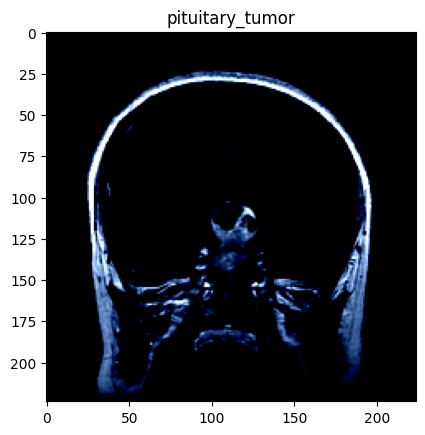

In [36]:
# there is no duplicated image in our dataset. now viewing an image and making a function to view image later on
import random
random_image, random_class= random.choice(val_data)
plt.imshow(random_image.permute(1,2,0))
image_class= class_names[random_class]
plt.title(image_class);

In [37]:
### Make predictions
pred_list= []
model.to(device)
model.eval()
with torch.inference_mode():
  for X, y in val_data:
    X= X.to(device)
    X= torch.unsqueeze(X, dim=0)
    y_pred= model(X)
    y_pred= torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    pred_list.append(y_pred.cpu())
pred_list= torch.stack(pred_list)


In [38]:
pred_list[1: 10]

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])

In [39]:
target= torch.tensor(val_data.targets)
pred_list= pred_list.squeeze()

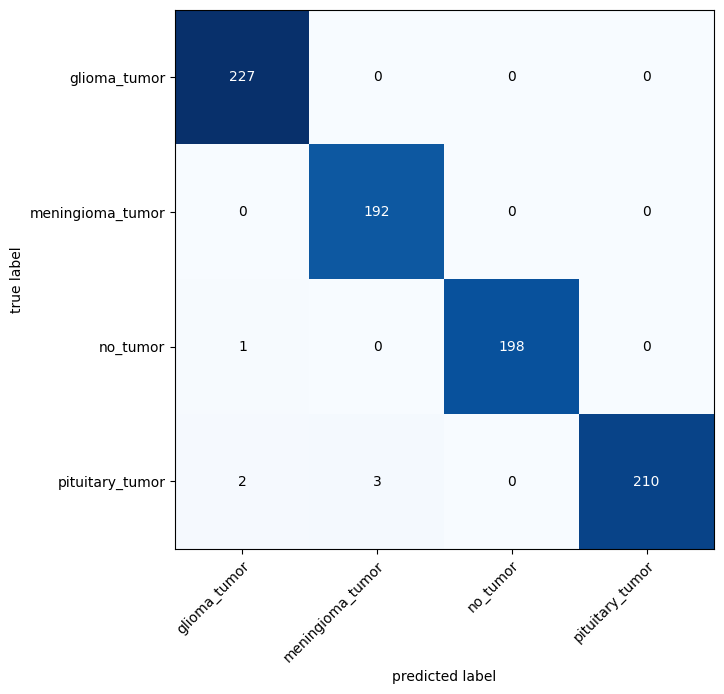

In [40]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


# setup confusion instance and compare predictions to target
confmat= ConfusionMatrix(num_classes= len(class_names), task= 'multiclass')
conf_tensor= confmat(preds= pred_list, target=target)

# create a graphical representation of the confusion matrix and change tensor to numpy array

fig, ax= plot_confusion_matrix(conf_mat=conf_tensor.numpy(), class_names= class_names, figsize= (10,7) )

In [42]:
# Import and class names setup
import gradio as gr
import os
import torch

from model import create_model
from timeit import default_timer as timer
from typing import Tuple, Dict

# Setup class names
with open('class_names.txt', 'r') as f:
  class_names= [name.strip() for name in f.readlines()]


# Model and transforms preparation
effnet_model, effnet_transform= create_model()
# Load state dict
effnet_model.load_state_dict(torch.load(
    f= '/content/Models/pretrained_effnetb0_feature_extractor_brain_tumor.pth',
    map_location= torch.device('cpu')
    )
)

# Predict function

def predict(img)-> Tuple[Dict, float]:
  # start a timer
  start_time= timer()

  #transform the input image for use with effnet b2
  transform_image= effnet_transform(img).unsqueeze(0)

  #put model into eval mode, make pred
  effnet_model.eval()
  with torch.inference_mode():
    pred_logits= effnet_model(transform_image)
    pred_prob= torch.softmax(pred_logits, dim=1)

  # create a pred label and pred prob dict
  pred_label_and_prob= {class_names[i]: float(pred_prob[0][i]) for i in range(len(class_names))}


  # calc pred time
  stop_time= timer()
  pred_time= round(stop_time - start_time, 4)


  # return pred dict and pred time
  return pred_label_and_prob, pred_time

# create gradio app
title= 'Brain Tumor Prediction App '
description= 'An EfficientnetB0 feature extractor Computer vision model to classify if a brain xray image have brain tumor and the type of tumor that is in the brain'
article= 'Created at [To be uploaded].'

# Create the gradio demo
demo= gr.Interface(fn= predict,
                   inputs=gr.Image(type='pil'),
                   outputs= [gr.Label(num_top_classes=5, label= 'predictions'),
                             gr.Number(label= 'Prediction time (S)')],
                   title= title,
                   description= description,
                   article= article
                   )

# Launch the demo
demo.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>